In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving yield_df.csv to yield_df.csv
Saving pesticides.csv to pesticides.csv
Saving rainfall.csv to rainfall.csv
Saving temp.csv to temp.csv
Saving yield.csv to yield.csv


In [ ]:
import os
print(os.listdir())

['.config', 'pesticides.csv', 'temp.csv', 'rainfall.csv', 'yield_df.csv', 'yield.csv', 'sample_data']


In [ ]:
# move /content files to directory in drive
!mv /content/*.csv /content/drive/MyDrive/AI_Accelarator

In [1]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('/content/drive/MyDrive/AI_Accelarator/yield_df.csv')

In [3]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [4]:
df = df.drop(columns=['Unnamed: 0'])

In [5]:
df['Item'].value_counts()

,count
Item,
Potatoes,4276
Maize,4121
Wheat,3857
"Rice, paddy",3388
Soybeans,3223
Sorghum,3039
Sweet potatoes,2890
Cassava,2045
Yams,847


In [6]:
df.isnull().sum().sort_values(ascending=False).head(10)

,0
Area,0
Item,0
Year,0
hg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0


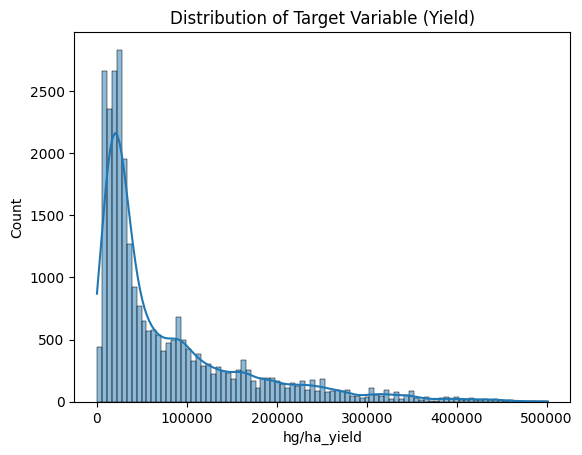

In [7]:
sns.histplot(df['hg/ha_yield'], kde=True)
plt.title("Distribution of Target Variable (Yield)")
plt.show()

In [8]:
#groupby countries for rainfall and yield
df_country = df.groupby(['Item','Year'])[['hg/ha_yield']].mean().sort_values(by = ['Item','Year'],ascending= True)
df_country

hg/ha_yield
Item    Year               
Cassava 1990  119292.738636
        1991  123852.761364
        1992  126751.516854
        1993  127019.561798
        1994  130528.955056
...                     ...
Yams    2009  120880.702703
        2010  124828.810811
        2011  122860.459459
        2012  120183.282051
        2013  121000.205128

[230 rows x 1 columns]

In [9]:
from scipy.stats import skew

In [10]:
target_skew = skew(df['hg/ha_yield'].dropna())
print(f"Skewness of 'hg/ha_yield': {target_skew:.2f}")

Skewness of 'hg/ha_yield': 1.79


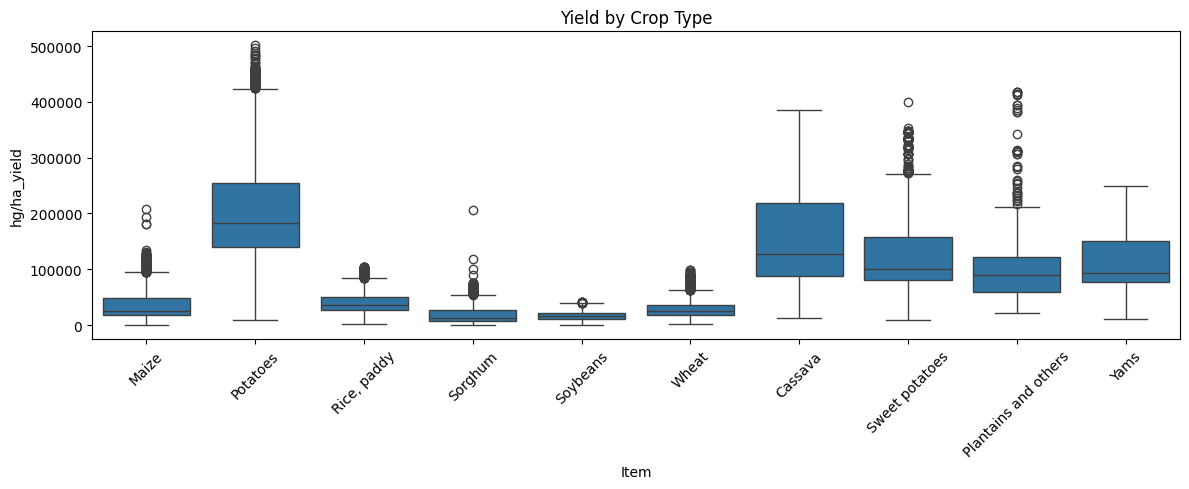

In [11]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='Item', y='hg/ha_yield')
plt.xticks(rotation=45)
plt.title("Yield by Crop Type")
plt.tight_layout()
plt.show()

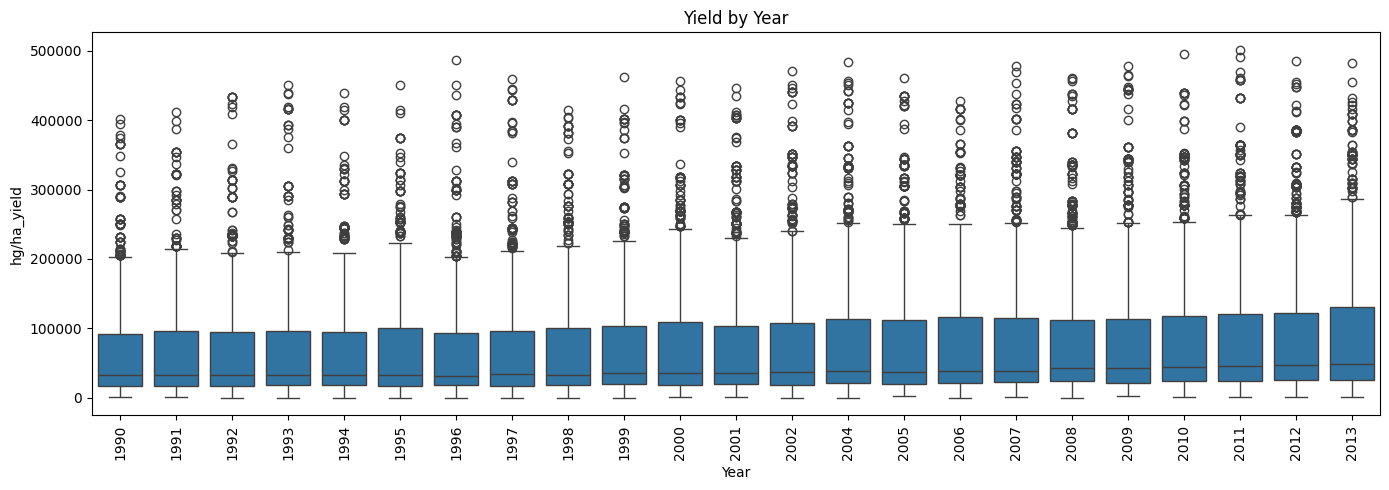

In [12]:
plt.figure(figsize=(14, 5))
sns.boxplot(data=df, x='Year', y='hg/ha_yield')
plt.xticks(rotation=90)
plt.title("Yield by Year")
plt.tight_layout()
plt.show()

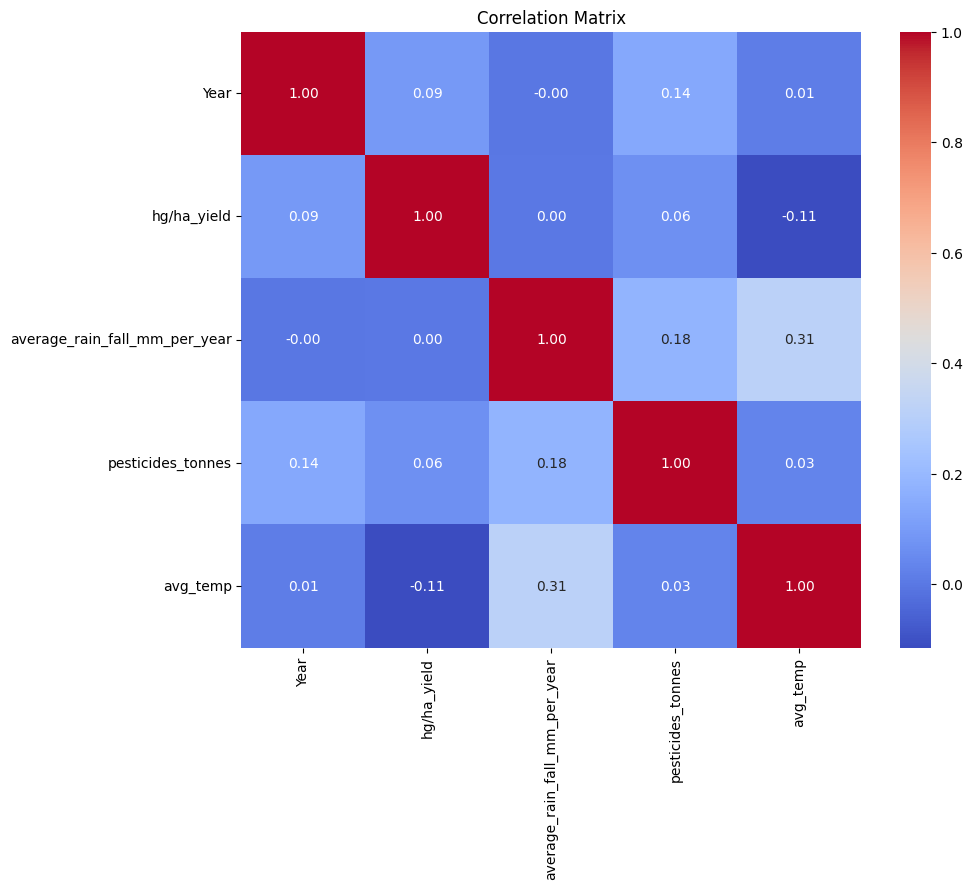

In [13]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [14]:
# Create a new column for transformed target
df['log_yield'] = np.log1p(df['hg/ha_yield'])

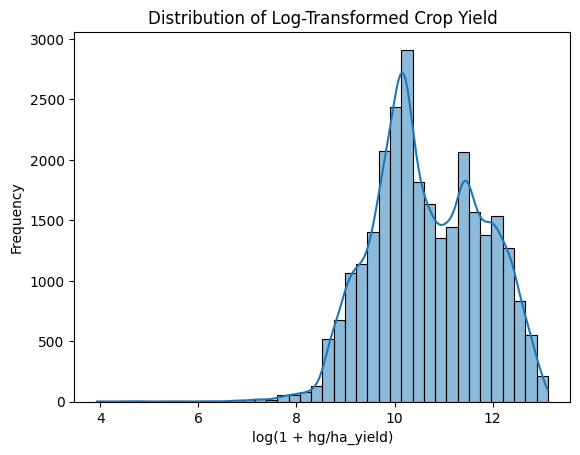

In [15]:
sns.histplot(df['log_yield'], bins=40, kde=True)
plt.title("Distribution of Log-Transformed Crop Yield")
plt.xlabel("log(1 + hg/ha_yield)")
plt.ylabel("Frequency")
plt.show()

In [16]:
# STart of Data Analytics

In [17]:
df1 = df.copy()

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le_area = LabelEncoder()
le_item = LabelEncoder()

In [20]:
# Encode categorical columns
df1['Area_encoded'] = le_area.fit_transform(df1['Area'])
df1['Item_encoded'] = le_item.fit_transform(df1['Item'])


In [21]:
# Check mapping
print("Area Mapping Example:", dict(list(zip(le_area.classes_, le_area.transform(le_area.classes_)))))
print("Item Mapping Example:", dict(list(zip(le_item.classes_, le_item.transform(le_item.classes_)))))

Area Mapping Example: {'Albania': 0, 'Algeria': 1, 'Angola': 2, 'Argentina': 3, 'Armenia': 4, 'Australia': 5, 'Austria': 6, 'Azerbaijan': 7, 'Bahamas': 8, 'Bahrain': 9, 'Bangladesh': 10, 'Belarus': 11, 'Belgium': 12, 'Botswana': 13, 'Brazil': 14, 'Bulgaria': 15, 'Burkina Faso': 16, 'Burundi': 17, 'Cameroon': 18, 'Canada': 19, 'Central African Republic': 20, 'Chile': 21, 'Colombia': 22, 'Croatia': 23, 'Denmark': 24, 'Dominican Republic': 25, 'Ecuador': 26, 'Egypt': 27, 'El Salvador': 28, 'Eritrea': 29, 'Estonia': 30, 'Finland': 31, 'France': 32, 'Germany': 33, 'Ghana': 34, 'Greece': 35, 'Guatemala': 36, 'Guinea': 37, 'Guyana': 38, 'Haiti': 39, 'Honduras': 40, 'Hungary': 41, 'India': 42, 'Indonesia': 43, 'Iraq': 44, 'Ireland': 45, 'Italy': 46, 'Jamaica': 47, 'Japan': 48, 'Kazakhstan': 49, 'Kenya': 50, 'Latvia': 51, 'Lebanon': 52, 'Lesotho': 53, 'Libya': 54, 'Lithuania': 55, 'Madagascar': 56, 'Malawi': 57, 'Malaysia': 58, 'Mali': 59, 'Mauritania': 60, 'Mauritius': 61, 'Mexico': 62, 'Monte

In [22]:
df1.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,log_yield,Area_encoded,Item_encoded
0,Albania,Maize,1990,36613,1485.0,121.0,16.37,10.508186,0,1
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37,11.107480,0,3
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37,10.057667,0,4
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37,9.433564,0,5
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37,8.853808,0,6


In [23]:
feature_cols = ['Area_encoded', 'Item_encoded', 'Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']
target_col = 'log_yield'

In [24]:
X = df1[feature_cols]
y = df1[target_col]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
!pip install -q xgboost

In [27]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [29]:
y_val_pred_log = xgb_model.predict(X_test)

In [30]:
# Reverse log transform
y_val_pred = np.expm1(y_val_pred_log)
y_val_actual = np.expm1(y_test)
# Reverse y_val too for true comparison


In [31]:
# Evaluate
rmse = np.sqrt(mean_squared_error(y_val_actual, y_val_pred))
r2 = r2_score(y_val_actual, y_val_pred)

print(f"Validation RMSE: {rmse:.2f}")
print(f"Validation R² Score: {r2:.3f}")

Validation RMSE: 29016.48
Validation R² Score: 0.884


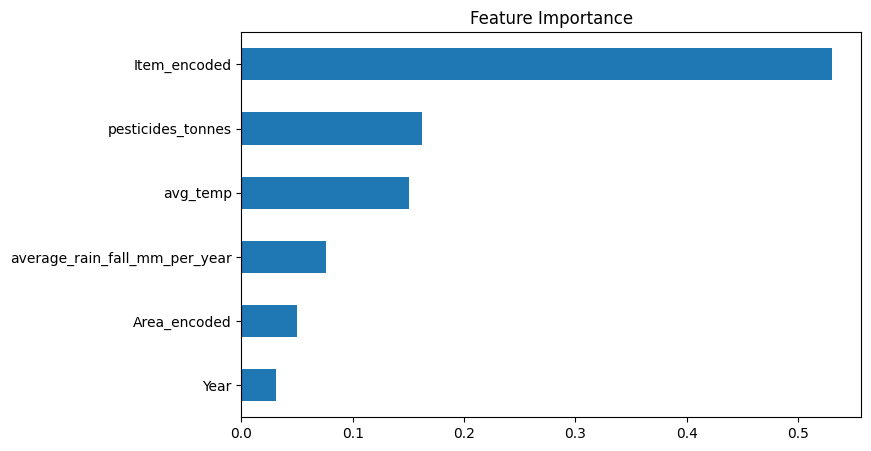

In [32]:
feature_importance = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
feature_importance.sort_values().plot(kind='barh', figsize=(8,5), title='Feature Importance')
plt.show()

In [33]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [34]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1]
}

In [35]:
xgb_base = XGBRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)


In [36]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [37]:
best_xgb = grid_search.best_estimator_

In [38]:
# Predict on validation
y_val_pred_log = best_xgb.predict(X_test)
y_val_pred = np.expm1(y_val_pred_log)
y_val_actual = np.expm1(y_test)

In [39]:
rmse = np.sqrt(mean_squared_error(y_val_actual, y_val_pred))
r2 = r2_score(y_val_actual, y_val_pred)

In [40]:
print("✅ Best Params:", grid_search.best_params_)
print(f"Validation RMSE: {rmse:.2f}")
print(f"Validation R² Score: {r2:.3f}")

✅ Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Validation RMSE: 20000.33
Validation R² Score: 0.945


In [41]:
results = {
    'Model': 'Tuned XGBoost',
    'Params': grid_search.best_params_,
    'RMSE': rmse,
    'R2': r2
}


In [42]:
!pip install -q lightgbm

In [43]:
import lightgbm as lgb

In [44]:
lgb_model = lgb.LGBMRegressor(
    objective='regression',
    learning_rate=0.05,
    n_estimators=500,
    max_depth=4,
    num_leaves=31,
    random_state=42
)

In [45]:
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001455 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 737
[LightGBM] [Info] Number of data points in the train set: 22593, number of used features: 6
[LightGBM] [Info] Start training from score 10.683230
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

LGBMRegressor(learning_rate=0.05, max_depth=4, n_estimators=500,
              objective='regression', random_state=42)

In [46]:
# Predict log-transformed target
y_val_pred_log_lgb = lgb_model.predict(X_test)

# Reverse log to original yield
y_val_pred_lgb = np.expm1(y_val_pred_log_lgb)
y_val_actual = np.expm1(y_test)

rmse_lgb = np.sqrt(mean_squared_error(y_val_actual, y_val_pred_lgb))
r2_lgb = r2_score(y_val_actual, y_val_pred_lgb)

print("✅ LightGBM Results")
print(f"Validation RMSE: {rmse_lgb:.2f}")
print(f"Validation R² Score: {r2_lgb:.3f}")


✅ LightGBM Results
Validation RMSE: 26365.10
Validation R² Score: 0.904


In [47]:
results_lgb = {
    'Model': 'LightGBM',
    'Params': lgb_model.get_params(),
    'RMSE': rmse_lgb,
    'R2': r2_lgb
}


In [49]:
from catboost import CatBoostRegressor

In [50]:
cat_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=4,
    loss_function='RMSE',
    verbose=100,
    random_state=42
)

In [51]:
cat_model.fit(X_train, y_train)

0:	learn: 1.0825680	total: 50.1ms	remaining: 25s
100:	learn: 0.5160594	total: 1.25s	remaining: 4.95s
200:	learn: 0.4401093	total: 2.47s	remaining: 3.67s
300:	learn: 0.4031458	total: 3.69s	remaining: 2.44s
400:	learn: 0.3795446	total: 4.82s	remaining: 1.19s
499:	learn: 0.3621023	total: 5.9s	remaining: 0us


In [53]:
y_val_pred_log_cat = cat_model.predict(X_test)


In [55]:
# Reverse log1p
y_val_pred_cat = np.expm1(y_val_pred_log_cat)
y_val_actual = np.expm1(y_test)


In [56]:
rmse_cat = np.sqrt(mean_squared_error(y_val_actual, y_val_pred_cat))
r2_cat = r2_score(y_val_actual, y_val_pred_cat)

print("✅ CatBoost Results")
print(f"Validation RMSE: {rmse_cat:.2f}")
print(f"Validation R² Score: {r2_cat:.3f}")

✅ CatBoost Results
Validation RMSE: 30554.21
Validation R² Score: 0.871


In [57]:
results_cat = {
    'Model': 'CatBoost',
    'Params': cat_model.get_params(),
    'RMSE': rmse_cat,
    'R2': r2_cat
}

In [58]:
# Advanced Feature Engineering

In [59]:
# Crop (Item) average yield
item_avg = df1.groupby('Item')['hg/ha_yield'].mean()
df1['Avg_Yield_by_Item'] = df1['Item'].map(item_avg)


In [62]:
# Area (Country) average yield
area_avg = df.groupby('Area')['hg/ha_yield'].mean()
df1['Avg_Yield_by_Area'] = df1['Area'].map(area_avg)

In [63]:
# Yield ratio = current / average for that crop
df1['Item_Area_Yield_Ratio'] = df1['hg/ha_yield'] / df1['Avg_Yield_by_Item']

In [65]:
top_items = item_avg.sort_values(ascending=False).head(3).index.tolist()
df1['Is_Top_Item'] = df1['Item'].apply(lambda x: 1 if x in top_items else 0)

In [66]:
df1['Decade'] = (df1['Year'] // 10) * 10

In [67]:
df1.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,log_yield,Area_encoded,Item_encoded,Avg_Yield_by_Item,Avg_Yield_by_Area,Item_Area_Yield_Ratio,Is_Top_Item,Decade
0,Albania,Maize,1990,36613,1485.0,121.0,16.37,10.508186,0,1,36310.070614,57692.282828,1.008343,0,1990
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37,11.107480,0,3,199801.549579,57692.282828,0.333666,1,1990
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37,10.057667,0,4,40730.434770,57692.282828,0.572864,0,1990
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37,9.433564,0,5,18635.777229,57692.282828,0.670753,0,1990
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37,8.853808,0,6,16731.092771,57692.282828,0.418383,0,1990


In [69]:
df1['Decade_encoded'] = LabelEncoder().fit_transform(df1['Decade'])

In [70]:
features = [
    'Item_encoded', 'Area_encoded', 'Year', 'Decade_encoded',
    'Avg_Yield_by_Item', 'Avg_Yield_by_Area',
    'Item_Area_Yield_Ratio', 'Is_Top_Item'
]

In [71]:
Xa = df1[features]
ya = df1['log_yield']  # log-transformed target


In [72]:
Xa_train, Xa_val, ya_train, ya_val = train_test_split(Xa, ya, test_size=0.2, random_state=42)

In [76]:
from sklearn.metrics import mean_squared_error, r2_score

In [73]:
# Use same feature set and splits
models = {
    'XGBoost': xgb_model,
    'LightGBM': lgb_model,
    'CatBoost': cat_model
}

In [78]:
for name, model in models.items():
    model.fit(Xa_train, ya_train)
    ya_pred_log = model.predict(Xa_val)
    ya_pred = np.expm1(ya_pred_log)
    ya_val_actual = np.expm1(ya_val)

    rmse = np.sqrt(mean_squared_error(ya_val_actual, ya_pred))
    r2 = r2_score(ya_val_actual, ya_pred)

    print(f"\n✅ {name} (with new features)")
    print(f"RMSE: {rmse:.2f} | R² Score: {r2:.3f}")


✅ XGBoost (with new features)
RMSE: 1670.25 | R² Score: 1.000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002405 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 22593, number of used features: 8
[LightGBM] [Info] Start training from score 10.683230
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


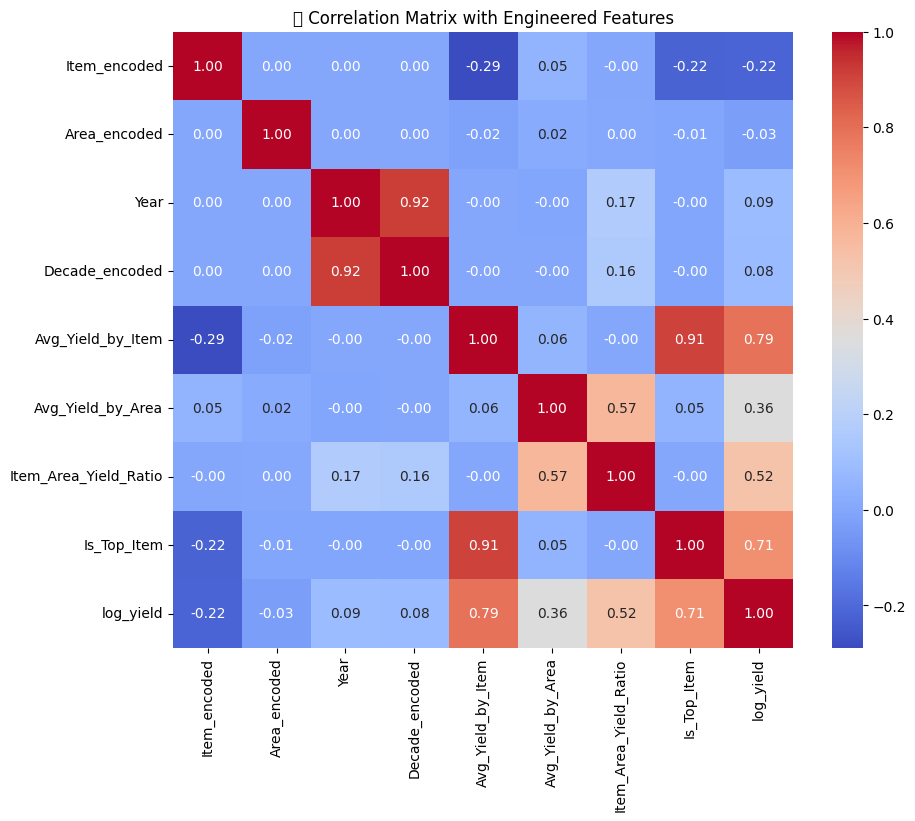

In [79]:
# Optional: Only check correlations on numeric features
correlation_matrix = df1[features + ['log_yield']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("📊 Correlation Matrix with Engineered Features")
plt.show()

In [80]:
# Classify based on median yield
threshold = df1['hg/ha_yield'].median()
df1['High_Yield'] = (df['hg/ha_yield'] > threshold).astype(int)

In [81]:
df1['High_Yield'].value_counts()

,count
High_Yield,
0,14126
1,14116


In [83]:
# New classification target
y_class = df1['High_Yield']

In [84]:
X_train_clf, X_val_clf, y_train_clf, y_val_clf = train_test_split(
    Xa, y_class, test_size=0.2, random_state=42, stratify=y_class
)

In [85]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [86]:
clf_models = {
    'XGBoost': XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=4, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(n_estimators=200, learning_rate=0.05, max_depth=4),
    'CatBoost': CatBoostClassifier(iterations=200, learning_rate=0.05, depth=4, verbose=0)
}

In [87]:
from sklearn.metrics import accuracy_score, f1_score

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:25:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📌 XGBoost Classification Report:
              precision    recall  f1-score   support

           0      1.000     0.998     0.999      2826
           1      0.998     1.000     0.999      2823

    accuracy                          0.999      5649
   macro avg      0.999     0.999     0.999      5649
weighted avg      0.999     0.999     0.999      5649

[LightGBM] [Info] Number of positive: 11293, number of negative: 11300
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 22593, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499845 -> initscore=-0.000620
[LightGBM] [Info] Start training from score -0.000620
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

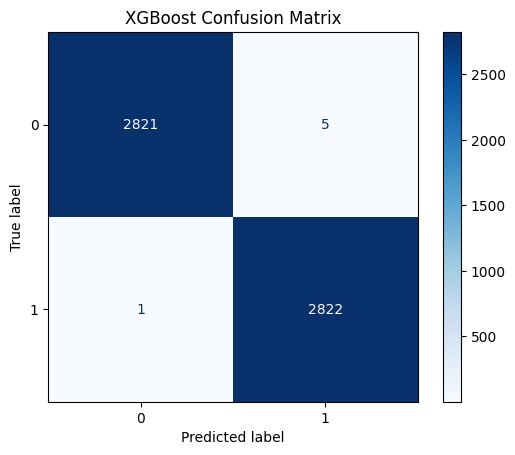

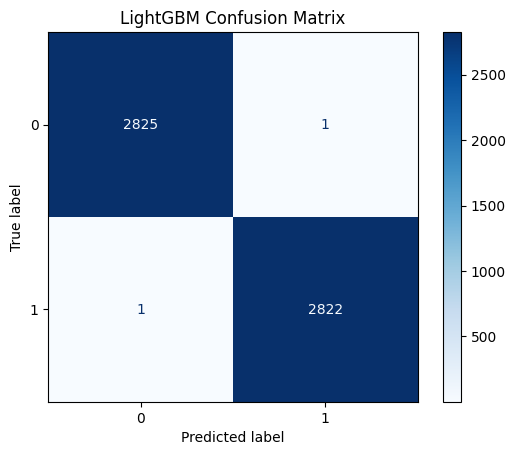

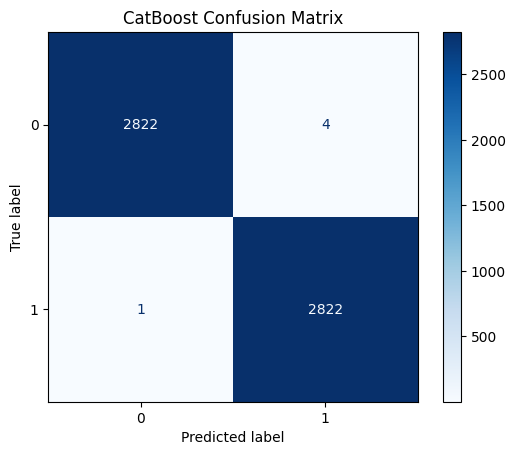

In [93]:
for name, clf in clf_models.items():
    clf.fit(X_train_clf, y_train_clf)
    y_pred_clf = clf.predict(X_val_clf)

    acc = accuracy_score(y_val_clf, y_pred_clf)
    f1 = f1_score(y_val_clf, y_pred_clf)

    print(f"\n📌 {name} Classification Report:")
    print(classification_report(y_val_clf, y_pred_clf, digits=3))

    # Confusion Matrix
    cm = confusion_matrix(y_val_clf, y_pred_clf)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot(cmap='Blues')
    disp.ax_.set_title(f"{name} Confusion Matrix")

    # Save to named result variable
    if name == "XGBoost":
        results_clf_xgb = {
            'Model': name,
            'Accuracy': round(acc, 3),
            'F1-Score': round(f1, 3),
            'Classifier': clf
        }
    elif name == "LightGBM":
        results_clf_lgb = {
            'Model': name,
            'Accuracy': round(acc, 3),
            'F1-Score': round(f1, 3),
            'Classifier': clf
        }
    elif name == "CatBoost":
        results_clf_cat = {
            'Model': name,
            'Accuracy': round(acc, 3),
            'F1-Score': round(f1, 3),
            'Classifier': clf
        }



In [91]:
def plot_feature_importance(model, model_name):
    importances = model.feature_importances_
    features_series = pd.Series(importances, index=Xa_train.columns)
    features_series = features_series.sort_values(ascending=False)

    plt.figure(figsize=(8, 5))
    sns.barplot(x=features_series, y=features_series.index)
    plt.title(f"{model_name} - Feature Importance")
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    plt.tight_layout()
    plt.show()

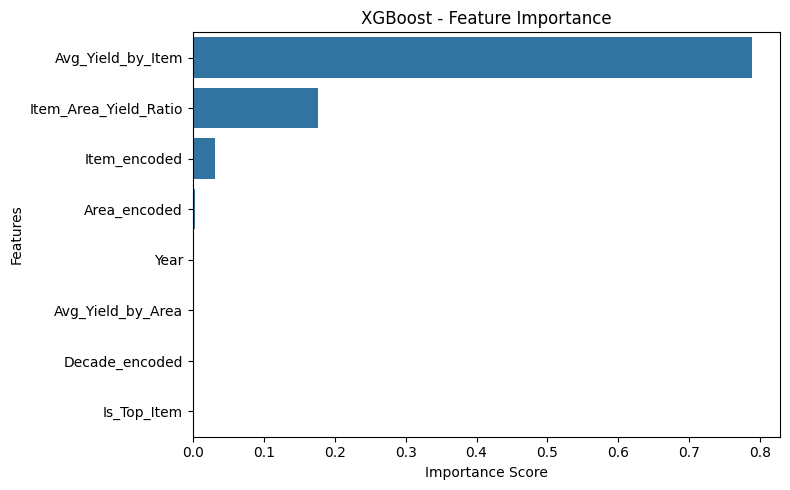

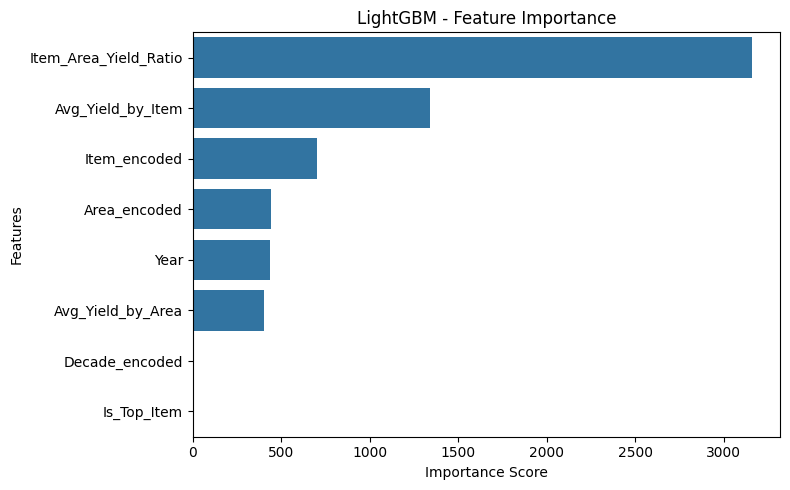

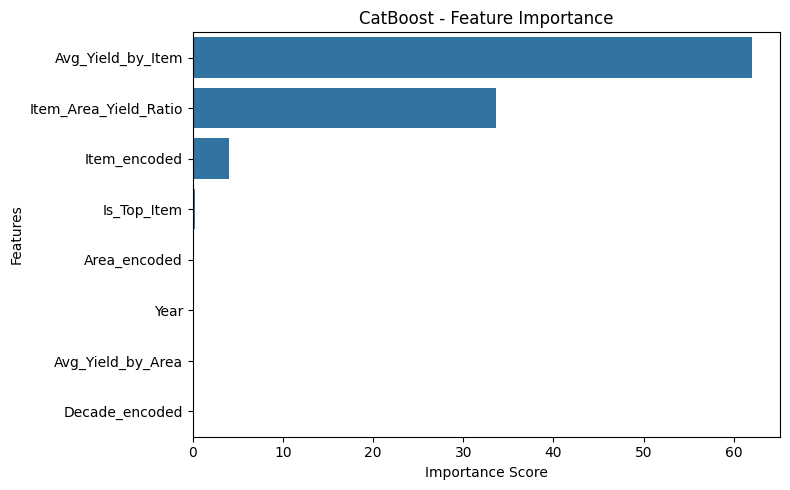

In [92]:
plot_feature_importance(xgb_model, "XGBoost")
plot_feature_importance(lgb_model, "LightGBM")
plot_feature_importance(cat_model, "CatBoost")

In [94]:
# Combine results from regression and classification
results_df = pd.DataFrame([
    results, results_lgb, results_cat, results_clf_xgb, results_clf_lgb, results_clf_cat
])

results_df.to_csv('crop_yield_model_summary.csv', index=False)

In [97]:
# activate pretty printing
from google.colab import data_table
data_table.enable_dataframe_formatter()